In [ ]:
!git clone "https://github.com/devasenan134/mfs.git"

Cloning into 'mfs'...
remote: Enumerating objects: 795, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 795 (delta 8), reused 18 (delta 4), pack-reused 770
Receiving objects: 100% (795/795), 234.40 MiB | 26.55 MiB/s, done.
Resolving deltas: 100% (247/247), done.
Updating files: 100% (355/355), done.


In [ ]:
import os
os.chdir("/content/mfs/overlaying")

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def get_mask_imgs(img_path):
    mask_imgs = []
    for img in os.listdir(img_path):
        if img.split('.')[-1] == 'png':
            mask_imgs.append(img_path+"/"+img)
    return mask_imgs

def read_imgs(mask_path):
    mask_imgs = get_mask_imgs(mask_path)
    # print(mask_imgs)
    masks = []
    for img in mask_imgs:
        mask = cv2.imread(img, 0)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        ret, bw_img = cv2.threshold(mask, 10, 255, cv2.THRESH_BINARY)
        # print(bw_img.shape)
        # plt.imshow(mask)
        masks.append(bw_img)
    return masks

def find_rectangle_manually(given_masks):
    rectangles = []
    for mask in given_masks:
        mask = np.array(mask)
        gray_mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
        # print(*gray_mask[400])
        row_ind = []
        for i in range(gray_mask.shape[0]):
            inds = np.where(gray_mask[i] == 255)[0]
            if inds.size != 0:
                row_ind.append(i)
        top, bottom = row_ind[0], row_ind[-1]

        col_ind = []
        for i in range(gray_mask.shape[1]):
            inds = np.where(gray_mask[:, i] == 255)[0]
            if inds.size != 0:
                col_ind.append(i)
        left, right = col_ind[0], col_ind[-1]

        rectangles.append([
            [left, top],
            [right, top],
            [right, bottom],
            [left, bottom]
        ])
    return rectangles

In [3]:
pip install rdp

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# erode = cv2.erode(mask, (5, 5), iterations = 10)
# plt.imshow(erode)

# morph = cv2.morphologyEx(mask, cv2.MORPH_OPEN, (5, 5), iterations=10)
# plt.imshow(morph)

# dil = cv2.dilate(erode, (5,5), iterations = 10)
# plt.imshow(dil)

In [48]:
from rdp import rdp
def find_peak_points(mask):
    msk = mask.copy()
    edge=cv2.Canny(msk, 30, 20)
    contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    ## separating the mask outline from all other unwanted contours
    outline = []
    for i in contours:
        # print(len(i))
        if i.shape[0] > 100:
            outline.extend(i)
    # print(outline.shape)

    msk = cv2.drawContours(msk, outline, -1, (0, 255, 0), 3)
    ## finding the peak points using the Douglas-Peucker algorithm
    pp=rdp(outline, epsilon=25)
    for i in pp:
        msk = cv2.circle(msk, i[0], 5, (0, 0, 255), -1)
    plt.imshow(msk)
    return np.array(pp)

def pick_peak_pts(mask, pp):
    rect = find_rectangle_manually([mask])[0]
    new_rect = []
    for p1 in rect:
        pt_dist = []
        for p2 in pp:
            dist = ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
            pt_dist = np.append(pt_dist, dist)
        # print(pt_dist)
        new_rect.append(pp[np.argmin(pt_dist)])

    tmp = mask.copy()
    for i in pp:
        tmp = cv2.circle(tmp, i, 10, (0, 0, 255), -1)
    for i in range(4):
        tmp = cv2.circle(tmp, rect[i], 8, (255, 0, 0), -1)
        tmp = cv2.circle(tmp, new_rect[i], 8, (0, 255, 0), -1)
    plt.imshow(tmp)

    return rect, np.array(new_rect)

In [49]:
USER_IMG = 'img3'

all_mask_paths = "../inputs/masks/{}".format(USER_IMG)
all_masks = read_imgs(all_mask_paths)
print(len(all_masks))

3


In [51]:
peak_pts, new_rectangles, rectangles, peak_points_for_masks = [], [], [], []

8


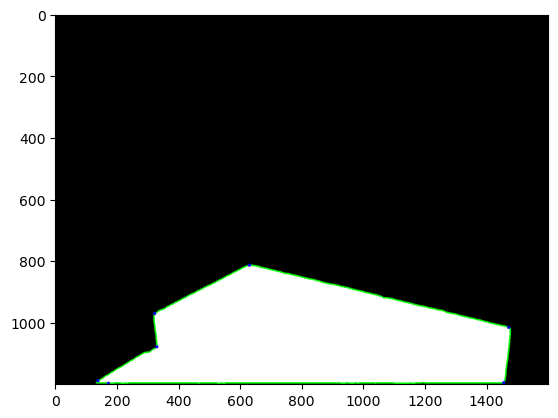

In [54]:
mask = all_masks[0]
peak_pts = find_peak_points(mask).reshape([-1, 2])
peak_points_for_masks.append(peak_pts)
print(len((peak_pts)))

array([[ 323,  971],
       [1472, 1016],
       [1456, 1195],
       [ 139, 1189]])

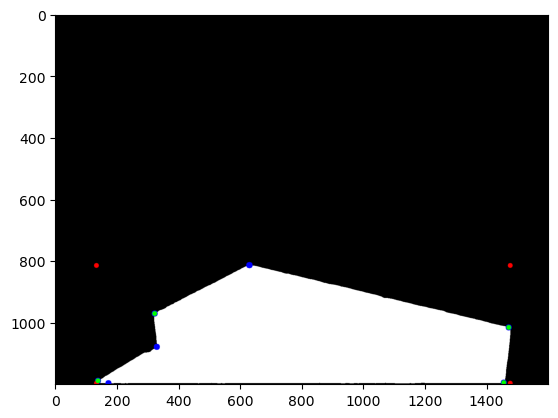

In [56]:
rect, new_rect = pick_peak_pts(mask, peak_pts)
rectangles.append(rect)
new_rectangles.append(new_rect)
new_rect

46


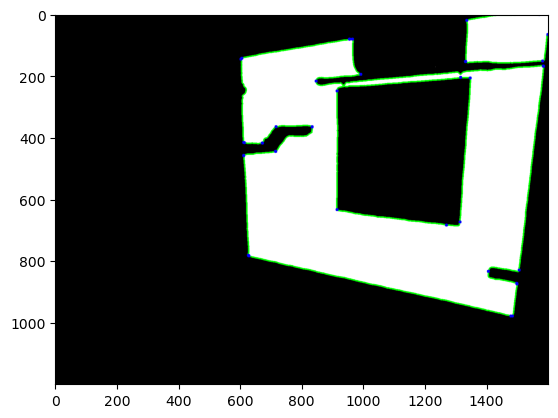

In [59]:
mask = all_masks[1]
peak_pts = find_peak_points(mask).reshape([-1, 2])
peak_points_for_masks.append(peak_pts)
print(len(peak_pts))

array([[ 606,  143],
       [1571,    0],
       [1484,  979],
       [ 629,  784]])

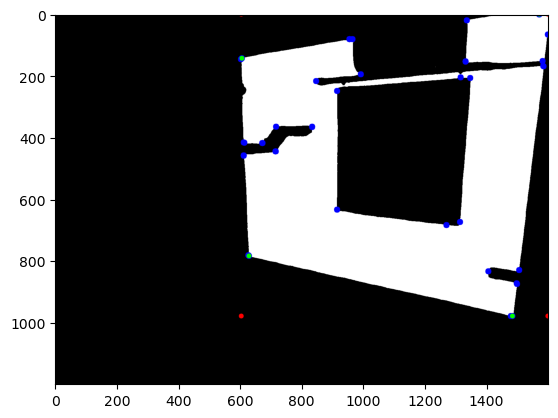

In [60]:
rect, new_rect = pick_peak_pts(mask, peak_pts)
rectangles.append(rect)
new_rectangles.append(new_rect)
new_rect

27


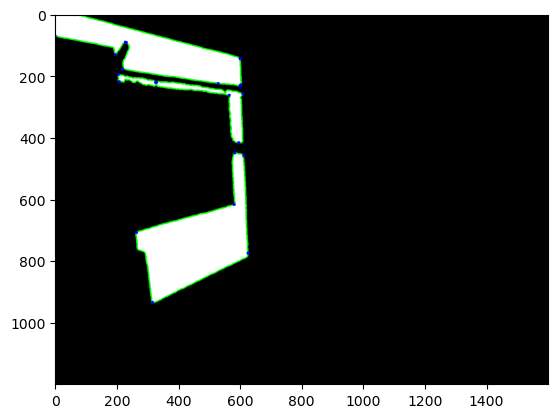

In [62]:
mask = all_masks[2]
peak_pts = find_peak_points(mask).reshape([-1, 2])
peak_points_for_masks.append(peak_pts)
print(len(peak_pts))

array([[ 63,   0],
       [600, 143],
       [626, 775],
       [316, 935]])

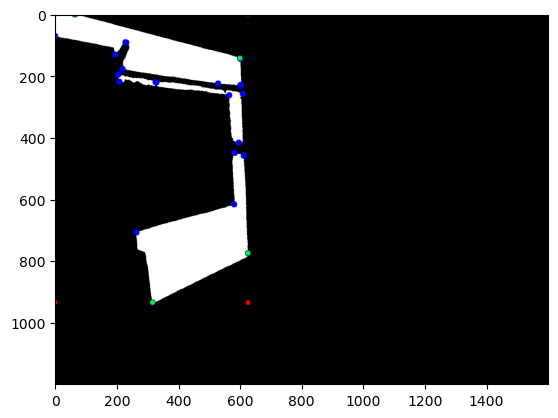

In [63]:
rect, new_rect = pick_peak_pts(mask, peak_pts)
rectangles.append(rect)
new_rectangles.append(new_rect)
new_rect

In [64]:
# mask = all_masks[3]
# peak_pts = find_peak_points(mask).reshape([-1, 2])
# peak_points_for_masks.append(peak_pts)
# print((peak_pts))

In [65]:
# rect, new_rect = pick_peak_pts(mask, peak_pts)
# rectangles.append(rect)
# new_rectangles.append(new_rect)
# new_rect

In [66]:
def isClose(pt, seed):
    # if abs(pt[0]-seed[0]) >= 275 and abs(pt[1]-seed[1]) >= 275:
    #     return False
    distance = ((pt[0] - seed[0]) ** 2 + (pt[1] - seed[1]) ** 2) ** 0.5
    if distance > 75:
      # print(distance)
      # if abs(pt[0] - 630) < 15:
      #   print(distance, pt, seed)
      return False
    # print(distance, pt, seed)
    return True

Method 3

In [67]:
def findLeft(pts, shape):
  mi, mipt = shape[0], None
  for pt in pts:
    if pt[0] < mi:
      mi = pt[0]
      mipt = pt
  return mipt

def findRight(pts, shape):
  ma, mapt = 0, None
  for pt in pts:
    if pt[0] > ma:
      ma = pt[0]
      mapt = pt
  return mapt

def findTop(pts, shape):
  mi, mipt = shape[1], None
  for pt in pts:
    print(pt, mi)
    if pt[1] < mi:
      mi = pt[1]
      mipt = pt
  return mipt

def findBottom(pts, shape):
  ma, mapt = 0, None
  for pt in pts:
    if pt[1] > ma:
      ma = pt[1]
      mapt = pt
  return mapt

In [68]:
def findExtremes(pts, shape):
  left, right, top, bottom = findLeft(pts, shape), findRight(pts, shape), findTop(pts, shape), findBottom(pts, shape)
  return [left, right, top, bottom]

In [82]:
# # A divide and conquer program to find convex
# # hull of a given set of points.
# from functools import cmp_to_key

# # stores the centre of polygon (It is made
# # global because it is used in compare function)
# mid = [0, 0]

# # determines the quadrant of a point
# # (used in compare())
# def quad(p):
# 	if p[0] >= 0 and p[1] >= 0:
# 		return 1
# 	if p[0] <= 0 and p[1] >= 0:
# 		return 2
# 	if p[0] <= 0 and p[1] <= 0:
# 		return 3
# 	return 4

# # Checks whether the line is crossing the polygon
# def orientation(a, b, c):
# 	res = (b[1]-a[1]) * (c[0]-b[0]) - (c[1]-b[1]) * (b[0]-a[0])
# 	if res == 0:
# 		return 0
# 	if res > 0:
# 		return 1
# 	return -1

# # compare function for sorting
# def compare(p1, q1):
# 	p = [p1[0]-mid[0], p1[1]-mid[1]]
# 	q = [q1[0]-mid[0], q1[1]-mid[1]]
# 	one = quad(p)
# 	two = quad(q)

# 	if one != two:
# 		if one < two:
# 			return -1
# 		return 1
# 	if p[1]*q[0] < q[1]*p[0]:
# 		return -1
# 	return 1

# # Finds upper tangent of two polygons 'a' and 'b'
# # represented as two vectors.
# def merger(a, b):
# 	# n1 -> number of points in polygon a
# 	# n2 -> number of points in polygon b
# 	n1, n2 = len(a), len(b)
# 	ia, ib = 0, 0

# 	# ia -> rightmost point of a
# 	for i in range(1, n1):
# 		if a[i][0] > a[ia][0]:
# 			ia = i

# 	# ib -> leftmost point of b
# 	for i in range(1, n2):
# 		if b[i][0] < b[ib][0]:
# 			ib = i
# 	# finding the upper tangent
# 	inda, indb = ia, ib
# 	done = 0
# 	while not done:
# 		done = 1
# 		while orientation(b[indb], a[inda], a[(inda+1) % n1]) >= 0:
# 			inda = (inda + 1) % n1

# 		while orientation(a[inda], b[indb], b[(n2+indb-1) % n2]) <= 0:
# 			indb = (indb - 1) % n2
# 			done = 0

# 	uppera, upperb = inda, indb
# 	inda, indb = ia, ib
# 	done = 0
# 	g = 0
# 	while not done: # finding the lower tangent
# 		done = 1
# 		while orientation(a[inda], b[indb], b[(indb+1) % n2]) >= 0:
# 			indb = (indb + 1) % n2

# 		while orientation(b[indb], a[inda], a[(n1+inda-1) % n1]) <= 0:
# 			inda = (inda - 1) % n1
# 			done = 0

# 	ret = []
# 	lowera, lowerb = inda, indb
# 	# ret contains the convex hull after merging the two convex hulls
# 	# with the points sorted in anti-clockwise order
# 	ind = uppera
# 	ret.append(a[uppera])
# 	while ind != lowera:
# 		ind = (ind+1) % n1
# 		ret.append(a[ind])

# 	ind = lowerb
# 	ret.append(b[lowerb])
# 	while ind != upperb:
# 		ind = (ind+1) % n2
# 		ret.append(b[ind])
# 	return ret

# # Brute force algorithm to find convex hull for a set
# # of less than 6 points
# def bruteHull(a):
# 	# Take any pair of points from the set and check
# 	# whether it is the edge of the convex hull or not.
# 	# if all the remaining points are on the same side
# 	# of the line then the line is the edge of convex
# 	# hull otherwise not
# 	global mid
# 	s = set()
# 	for i in range(len(a)):
# 		for j in range(i+1, len(a)):
# 			x1, x2 = a[i][0], a[j][0]
# 			y1, y2 = a[i][1], a[j][1]
# 			a1, b1, c1 = y1-y2, x2-x1, x1*y2-y1*x2
# 			pos, neg = 0, 0
# 			for k in range(len(a)):
# 				if (k == i) or (k == j) or (a1*a[k][0]+b1*a[k][1]+c1 <= 0):
# 					neg += 1
# 				if (k == i) or (k == j) or (a1*a[k][0]+b1*a[k][1]+c1 >= 0):
# 					pos += 1
# 			if pos == len(a) or neg == len(a):
# 				s.add(tuple(a[i]))
# 				s.add(tuple(a[j]))

# 	ret = []
# 	for x in s:
# 		ret.append(list(x))

# 	# Sorting the points in the anti-clockwise order
# 	mid = [0, 0]
# 	n = len(ret)
# 	for i in range(n):
# 		mid[0] += ret[i][0]
# 		mid[1] += ret[i][1]
# 		ret[i][0] *= n
# 		ret[i][1] *= n
# 	ret = sorted(ret, key=cmp_to_key(compare))
# 	for i in range(n):
# 		ret[i] = [ret[i][0]/n, ret[i][1]/n]
# 	return ret

# # Returns the convex hull for the given set of points
# def divide(a):
# 	# If the number of points is less than 6 then the
# 	# function uses the brute algorithm to find the
# 	# convex hull
# 	if len(a) <= 5:
# 		return bruteHull(a)

# 	# left contains the left half points
# 	# right contains the right half points
# 	left, right = [], []
# 	start = int(len(a)/2)
# 	for i in range(start):
# 		left.append(a[i])
# 	for i in range(start, len(a)):
# 		right.append(a[i])

# 	# convex hull for the left and right sets
# 	left_hull = divide(left)
# 	right_hull = divide(right)

# 	# merging the convex hulls
# 	return merger(left_hull, right_hull)



In [83]:
# convexHulls = []
# for pts in peak_points_for_masks:
#   pts.sort()
#   convexHulls.append(divide(pts))
# for hulls in convexHulls:
#   print(hulls)
#   print('-------------------------------------------------------------')

In [84]:
extremes = []
for pts in peak_points_for_masks:
  extremes.append(findExtremes(pts, all_masks[0].shape))
for _ in extremes:
  print(_)
  print('--------------------------------------------------------------')

[630 814] 1600
[323 971] 814
[ 330 1079] 814
[ 139 1189] 814
[ 173 1197] 814
[1195 1456] 814
[1016 1472] 814
[631 814] 814
[630 814] 1600
[323 971] 814
[ 330 1079] 814
[ 139 1189] 814
[ 173 1197] 814
[1195 1456] 814
[1016 1472] 814
[631 814] 814
[630 814] 1600
[323 971] 814
[ 330 1079] 814
[ 139 1189] 814
[ 173 1197] 814
[1195 1456] 814
[1016 1472] 814
[631 814] 814
[ 205 1316] 1600
[249 915] 1316
[634 915] 915
[ 684 1270] 915
[ 674 1314] 915
[ 207 1347] 915
[ 81 955] 915
[143 606] 915
[416 612] 606
[418 673] 606
[365 717] 606
[366 834] 606
[445 715] 606
[458 612] 606
[627 782] 606
[ 979 1484] 606
[ 873 1498] 606
[ 834 1406] 606
[ 830 1506] 606
[ 168 1584] 606
[217 847] 606
[ 169 1585] 606
[ 830 1506] 606
[ 834 1406] 606
[ 875 1499] 606
[ 979 1479] 606
[629 784] 606
[459 612] 606
[445 716] 606
[365 834] 606
[365 717] 606
[418 672] 606
[417 614] 606
[146 603] 606
[ 81 965] 603
[195 992] 603
[ 81 956] 603
[   0 1571] 603
[  20 1336] 603
[ 154 1332] 603
[ 152 1582] 603
[  66 1599] 603
[ 1

In [33]:
def isFloor(pts, shape):
  for pt in pts:
    if pt[1] < shape[1] * 0.3:
      return False
  return True

In [34]:
#---------------To arrange the points clockwise---------------
def order_points(pts):
    if len(pts) == 4:
        pts = np.array(pts)
        rect = np.zeros((4, 2), dtype = "float32")
        s = pts.sum(axis = 1)
        rect[0] = pts[np.argmin(s)]
        rect[2] = pts[np.argmax(s)]
        diff = np.diff(pts, axis = 1)
        rect[1] = pts[np.argmin(diff)]
        rect[3] = pts[np.argmax(diff)]
    else:
        pts = np.array(pts)
        rect = np.zeros((2, 2), dtype = "float32")
        s = pts.sum(axis = 1)
        rect[0] = pts[np.argmin(s)]
        diff = np.diff(pts, axis = 1)
        rect[1] = pts[np.argmin(diff)]
    return rect

In [35]:
def isCloseToEdge(pt, shape):
  if pt[0] > 50 and pt[0] < shape[0] - 50:
    return True
  return False

In [36]:
def isLeft(pts, shape):
  for pt in pts:
    if pt[0] > 0.7 * shape[0]:
      return False
  return True

In [85]:
finalTransformableCoordinates = []

for i in range(len(peak_points_for_masks)):
  if isFloor(new_rectangles[i], all_masks[0].shape):
    vertices = order_points(new_rectangles[i])
    if (isCloseToEdge(vertices[0], all_masks[0].shape) and isCloseToEdge(vertices[1], all_masks[0].shape)):
      print('1111')
      x1, y1 = extremes[i][2]
      x2, y2 = vertices[0]
      x3, y3 = vertices[1]
      y = 2 * all_masks[0].shape[1] - y1
      x2d = int(((all_masks[0].shape[1] - y1) / (y2 - y1)) * (x2 - x1) + x1)
      x3d = int(((all_masks[0].shape[1] - y1) / (y3 - y1)) * (x3 - x1) + x1)
      x = x3d - x2d - x1 + x2d
      finalTransformableCoordinates.append([[x1,y1], [x3d,all_masks[0].shape[1]], [x,y], [x2d,all_masks[0].shape[1]]])
    elif (isCloseToEdge(vertices[0], all_masks[0].shape)):
      print('2222')
      x1, y1 = extremes[i][2]
      x2, y2 = vertices[0]
      x3, y3 = vertices[1]
      y = 2 * all_masks[0].shape[1] - y1
      x = all_masks[0].shape[0] - x1
      x2d = int(((all_masks[0].shape[1] - y1) / (y2 - y1)) * (x2 - x1) + x1)
      x3d = int(((all_masks[0].shape[1] - y1) / (y3 - y1)) * (x3 - x1) + x1)
      x = x3d - x2d - x1 + x2d
      finalTransformableCoordinates.append([[x1,y1], [x3d,all_masks[0].shape[1]], [x,y], [x2d,all_masks[0].shape[1]]])
    elif (vertices[0][1] > all_masks[0].shape[1] - 50 and isCloseToEdge(vertices[1], all_masks[0].shape)):
      print('3333')
      x1, y1 = extremes[i][2]
      x2, y2 = vertices[0]
      x3, y3 = vertices[1]
      y = 2 * all_masks[0].shape[1] - y1
      x = all_masks[0].shape[0] - x1
      x2d = int(((all_masks[0].shape[1] - y1) / (y2 - y1)) * (x2 - x1) + x1)
      x3d = int(((all_masks[0].shape[1] - y1) / (y3 - y1)) * (x3 - x1) + x1)
      x = x3d - x2d - x1 + x2d
      finalTransformableCoordinates.append([[x1,y1], [x3d,all_masks[0].shape[1]], [x,y], [x2d,all_masks[0].shape[1]]])
    else:
      x1, y1 = extremes[i][2]
      if y1 == vertices[0][1] or y1 == vertices[1][1]:
        finalTransformableCoordinates.append(vertices)
      else:
        print('4444')
        print(vertices)
        print(extremes[i])
        x2, y2 = vertices[0]
        x3, y3 = vertices[1]
        y = 2 * all_masks[0].shape[1] - y1
        x = all_masks[0].shape[0] - x1
        x2d = int(((all_masks[0].shape[1] - y1) / (y2 - y1)) * (x2 - x1) + x1)
        x3d = int(((all_masks[0].shape[1] - y1) / (y3 - y1)) * (x3 - x1) + x1)
        x = x3d - x2d - x1 + x2d
        finalTransformableCoordinates.append([[x1,y1], [x3d,all_masks[0].shape[1]], [x,y], [x2d,all_masks[0].shape[1]]])
  else:
    vertices = order_points(new_rectangles[i])
    if isLeft(new_rectangles[i], all_masks[0].shape):
      # print(vertices)
      # print(extremes)
      x1, y1 = extremes[i][2]
      x2, y2 = vertices[1]
      if y1 == y2:
        x1, y1 = vertices[0]
      x = extremes[i][0][0]
      y = int((((x-x1)/(x2-x1))*(y2-y1)) + y1)
      x3, y3 = extremes[i][3]
      x4, y4 = vertices[2]
      if y3 == y4:
        x3, y3 = vertices[3]
      xd = extremes[i][0][0]
      yd = int((((xd-x3)/(x4-x3))*(y4-y3)) + y3)
      finalTransformableCoordinates.append([[x,y], vertices[1], vertices[2], [xd,yd]])
    else:
      # print(vertices)
      # print(extremes[i])
      x1, y1 = extremes[i][2]
      x2, y2 = vertices[0]
      if y1 == y2:
        x1, y1 = vertices[1]
      x = extremes[i][1][0]
      y = int((((x-x1)/(x2-x1))*(y2-y1)) + y1)
      x3, y3 = extremes[i][3]
      x4, y4 = vertices[3]
      if y3 == y4:
        x3, y3 = vertices[2]
      xd = extremes[i][1][0]
      yd = int((((xd-x3)/(x4-x3))*(y4-y3)) + y3)
      # print(i, y, yd)
      finalTransformableCoordinates.append([vertices[0], [x,y], [xd,yd], vertices[3]])

for boxes in finalTransformableCoordinates:
  print(boxes)
  print('--------------------------------------------------------------------------------------------------------------------')

2222
2222


IndexError: list index out of range

Method 2

In [86]:
linkedlist = []
for i in range(len(peak_points_for_masks)):
  for pt in peak_points_for_masks[i]:
    # if i ==0:
      # print(str(pt)+" first mask points")
    # if pt[0] == 626 and pt[1] == 775:
      # print(linkedlist)
      # print()
      # print("----------------------------")
      # print()
    flag = True
    for sublist in linkedlist:
      if isClose(pt, sublist[0][0]):
        sublist.append([pt, i])
        flag = False
    if flag:
      linkedlist.append([[pt,i]])

twoMaskIntersection, threeMaskIntersection = [], []

for sublist in linkedlist:
  # print(sublist)
  c, uniqueIndex, seed = 0, [], sublist[0][0]
  for entry in sublist:
    if entry[1] not in uniqueIndex:
      uniqueIndex.append(entry[1])
      c += 1
  if c == 2:
    twoMaskIntersection.append([seed,uniqueIndex])
  if c == 3:
    threeMaskIntersection.append([seed,uniqueIndex])
# print('####################################')

if len(all_masks) >= 3:
  for pt in twoMaskIntersection:
    print('Point : '+ str(pt[0]) + ' Intersecting masks are : ' + str(pt[1]))
  print('----------------------------------')
  print("The fixed points are:")
  for pt in threeMaskIntersection:
    print('Point : '+ str(pt[0]) + ' Intersecting masks are : ' + str(pt[1]))
else:
  print("The fixed points are:")
  for pt in twoMaskIntersection:
    print('Point : '+ str(pt[0]) + ' Intersecting masks are : ' + str(pt[1]))


Point : [ 205 1316] Intersecting masks are : [3, 4]
Point : [634 915] Intersecting masks are : [3, 4]
Point : [ 684 1270] Intersecting masks are : [3, 4]
Point : [ 81 955] Intersecting masks are : [3, 4]
Point : [365 717] Intersecting masks are : [3, 4]
Point : [366 834] Intersecting masks are : [3, 4]
Point : [445 715] Intersecting masks are : [3, 4]
Point : [ 873 1498] Intersecting masks are : [3, 4]
Point : [ 834 1406] Intersecting masks are : [3, 4]
Point : [ 168 1584] Intersecting masks are : [3, 4]
Point : [217 847] Intersecting masks are : [3, 4]
Point : [195 992] Intersecting masks are : [3, 4]
Point : [   0 1571] Intersecting masks are : [3, 4]
Point : [  20 1336] Intersecting masks are : [3, 4]
Point : [581 617] Intersecting masks are : [5, 6]
Point : [264 708] Intersecting masks are : [5, 6]
Point : [221 329] Intersecting masks are : [5, 6]
Point : [263 565] Intersecting masks are : [5, 6]
Point : [208 219] Intersecting masks are : [5, 6]
Point : [ 0 63] Intersecting masks a

Method 1

In [40]:
corner_pts, di, li2 = [], {}, []
for i in range(len(peak_points_for_masks)):
  # if i == 0:
  #   for pt in peak_points_for_masks[i]:
  #     flag = True
  #     for pt1 in di.keys():
  #       if i in di[pt1][3]:
  #         continue
  #       if isClose(pt, di[pt1][2]):
  #         flag = False
  #         di[pt1][2][0] = di[pt1][1][0] + pt[0] // 2
  #         di[pt1][2][1] = di[pt1][1][1] + pt[1] // 2
  #         di[pt1][1][0] = di[pt1][2][0]
  #         di[pt1][1][1] = di[pt1][2][1]
  #     # print(pt)
  #     if flag:
  #       di[tuple(pt)] = [1, pt, pt, [i]]
  # else:
  #   for pt in peak_points_for_masks[i]:
  #     flag = True
  #     for pt1 in di.keys():
  #       if i in di[pt1][3]:
  #         continue
  #       if isClose(pt, di[pt1][2]):
  #         flag = False
  #         di[pt1][0] += 1
  #         di[pt1][1][0] += pt[0]
  #         di[pt1][1][1] += pt[1]
  #         di[pt1][2][0] = di[pt1][1][0] // di[pt1][0]
  #         di[pt1][2][1] = di[pt1][1][1] // di[pt1][0]
  #         di[pt1][3].append(i)
  #     if flag:
  #       di[tuple(pt)] = [1, pt, pt, [i]]
  for pt in peak_points_for_masks[i]:
    flag, fl = True, True
    for pt1 in di.keys():
      if i in di[pt1][3]:
        fl = False
        continue
        if i == 2:
          print('ttttttt', pt, di[pt1][2],isClose(pt, di[pt1][2]))
      if isClose(pt, di[pt1][2]):
        flag = False
        di[pt1][0] += 1
        di[pt1][1][0] += pt[0]
        di[pt1][1][1] += pt[1]
        di[pt1][2][0] = di[pt1][1][0] // di[pt1][0]
        di[pt1][2][1] = di[pt1][1][1] // di[pt1][0]
        di[pt1][3].append(i)
        break
    if flag:
      if fl:
        di[tuple(pt)] = [1, pt, pt, [i]]
      else:
        if isClose(pt, di[pt1][2]):
          flag = False
          di[pt1][1][0] += pt[0]
          di[pt1][1][1] += pt[1]
          di[pt1][2][0] = di[pt1][1][0] // 2
          di[pt1][2][1] = di[pt1][1][1] // 2
          di[pt1][1][0] += di[pt1][2][0]
          di[pt1][1][1] += di[pt1][2][1]
print(len(di.keys()))
for key in di.keys():
  if di[key][0] > 1:
    li2.append(di[key][2])
    print(di[key][2], key, di[key][3])


3
[1260 1628] (1260, 1628) [3, 4]


In [41]:
def isSame(pt, pt1):
  if pt[0] != pt1[0] or pt[1] != pt1[1]:
    return False
  return True

In [42]:
li1 = []
for i in range(len(new_rectangles)):
  for pt in new_rectangles[i]:
    print(i, str(pt) + '  - 1')
    for p in li2:
      if isClose(pt, p):
        flag = True
        for pt1 in li1:
          if isSame(pt, pt1):
            flag = False
            break
        if flag:
          li1.append(pt)
          print(i, pt, p)


0 [323 971]  - 1
0 [1472 1016]  - 1
0 [1456 1195]  - 1
0 [ 139 1189]  - 1
1 [606 143]  - 1
1 [1571    0]  - 1
1 [1484  979]  - 1
1 [629 784]  - 1
2 [63  0]  - 1
2 [600 143]  - 1
2 [626 775]  - 1
2 [316 935]  - 1
3 [63  0]  - 1
3 [600 143]  - 1
3 [626 775]  - 1
3 [316 935]  - 1
4 [63  0]  - 1
4 [600 143]  - 1
4 [626 775]  - 1
4 [316 935]  - 1


In [43]:
li1 = []
for i in range(len(peak_points_for_masks)):
  for pt in peak_points_for_masks[i]:
    # print(i, str(pt) + '  - 1')
    for p in li2:
      if isClose(pt, p):
        flag = True
        for pt1 in li1:
          if isClose(pt, pt1):
            flag = False
            break
        if flag:
          # print(li1)
          li1.append(p)
          print(i, pt, p)

1 [1260 1628] [1260 1628]
